# Multiple Y-axes and Twin Axes

### What are Multiple Y-axes and Twin Axes?

In many real-world datasets, we often want to compare **two or more variables that share the same X-axis but have different scales of values**. For example, in sales data, we might want to compare **Revenue (in thousands)** and **Discount (in percentages)** over the same time period. If we try to plot both on a single Y-axis, one variable might dominate the scale, making the other invisible or misleading.

This is where **multiple Y-axes** come in. Matplotlib provides the **`twinx()`** and **`twiny()`** functions to create twin axes.

- `twinx()` → shares the same **X-axis** but creates a new **Y-axis** on the right.
- `twiny()` → shares the same **Y-axis** but creates a new **X-axis** on the top.

By using these, we can plot two (or more) variables with different scales in a single figure, making it easier to see correlations or comparisons between them.

In **AI/ML and data science**, multiple Y-axes are useful for:

- Comparing **training loss vs. validation accuracy** across epochs.
- Showing **sales vs. discount percentage** over time.
- Visualizing **temperature vs. humidity** in climate data.
- Comparing **stock price vs. trading volume** in finance.

Thus, twin axes are a great way to represent **multiscale relationships** clearly and without distortion.

**Common Twin Axes Examples**

Basic `twinx()` Example

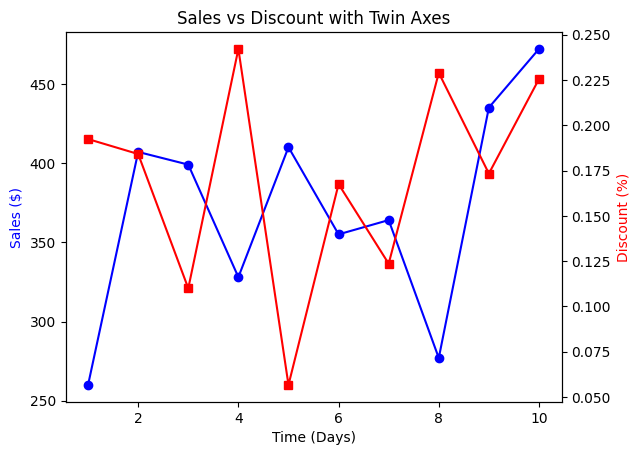

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 11)
sales = np.random.randint(100, 500, size=10)
discount = np.random.uniform(0.05, 0.3, size=10)

fig, ax1 = plt.subplots()

# First axis
ax1.plot(x, sales, color="blue", marker="o", label="Sales")
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Sales ($)", color="blue")

# Second axis
ax2 = ax1.twinx()
ax2.plot(x, discount, color="red", marker="s", label="Discount")
ax2.set_ylabel("Discount (%)", color="red")

plt.title("Sales vs Discount with Twin Axes")
plt.show()

Using `twiny()` (Shared Y-axis, Different X-axes)

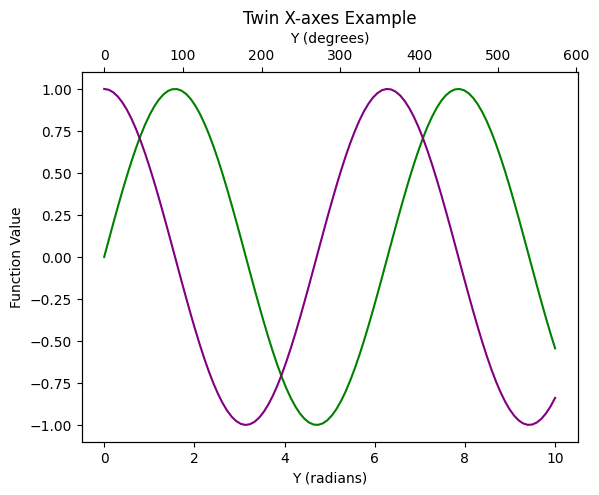

In [2]:
y = np.linspace(0, 10, 100)
f1 = np.sin(y)
f2 = np.cos(y)

fig, ax1 = plt.subplots()

ax1.plot(y, f1, color="green", label="sin(y)")
ax1.set_xlabel("Y (radians)")
ax1.set_ylabel("Function Value")

# Second X-axis
ax2 = ax1.twiny()
ax2.plot(y*180/np.pi, f2, color="purple", label="cos(y)")
ax2.set_xlabel("Y (degrees)")

plt.title("Twin X-axes Example")
plt.show()

Multiple Y-axes with Custom Colors

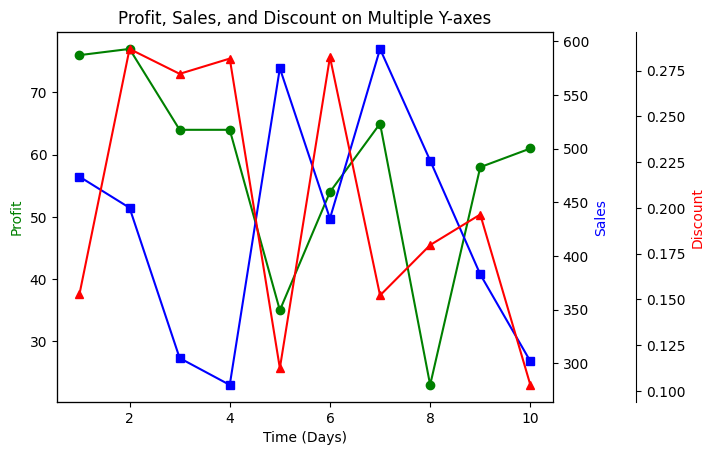

In [3]:
x = np.arange(1, 11)
profit = np.random.randint(20, 80, size=10)
sales = np.random.randint(200, 600, size=10)
discount = np.random.uniform(0.05, 0.3, size=10)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Profit", color="green")
ax1.plot(x, profit, color="green", marker="o")

ax2 = ax1.twinx()
ax2.set_ylabel("Sales", color="blue")
ax2.plot(x, sales, color="blue", marker="s")

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # offset third axis
ax3.set_ylabel("Discount", color="red")
ax3.plot(x, discount, color="red", marker="^")

plt.title("Profit, Sales, and Discount on Multiple Y-axes")
plt.show()

### Exercises

Q1. Plot Sales vs. Profit on twin Y-axes, sharing the same X-axis (Orders).

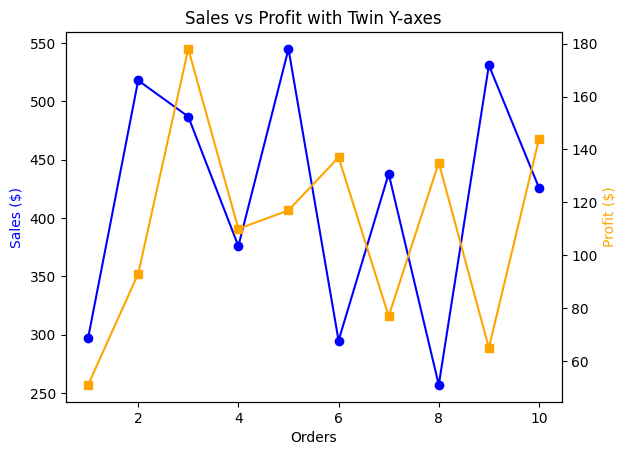

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.arange(1, 11)
sales = np.random.randint(200, 600, size=10)
profit = np.random.randint(50, 200, size=10)

# Create figure and first axis
fig, ax1 = plt.subplots()

ax1.plot(x, sales, color="blue", marker="o", label="Sales")
ax1.set_xlabel("Orders")
ax1.set_ylabel("Sales ($)", color="blue")

# Second Y-axis
ax2 = ax1.twinx()
ax2.plot(x, profit, color="orange", marker="s", label="Profit")
ax2.set_ylabel("Profit ($)", color="orange")

plt.title("Sales vs Profit with Twin Y-axes")
plt.show()

Q2. Create a `twiny()` plot showing Quantity vs. Discount, with X-axis in original scale and % scale on top.

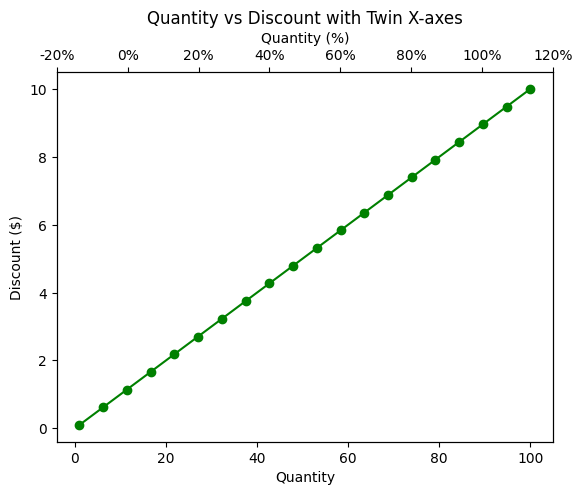

In [5]:
import pandas as pd
df = pd.read_csv("data/Superstore.csv", encoding='latin-1')

quantity = np.linspace(1, 100, 20)
discount = quantity * 0.1  # fake relation

fig, ax1 = plt.subplots()

# First X-axis (original scale)
ax1.plot(quantity, discount, color="green", marker="o")
ax1.set_xlabel("Quantity")
ax1.set_ylabel("Discount ($)")

# Second X-axis (percentage scale)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # sync range
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([f"{int(val)}%" for val in ax1.get_xticks()])
ax2.set_xlabel("Quantity (%)")

plt.title("Quantity vs Discount with Twin X-axes")
plt.show()

Q3. Plot Stock Price vs. Trading Volume on twin axes (random data).

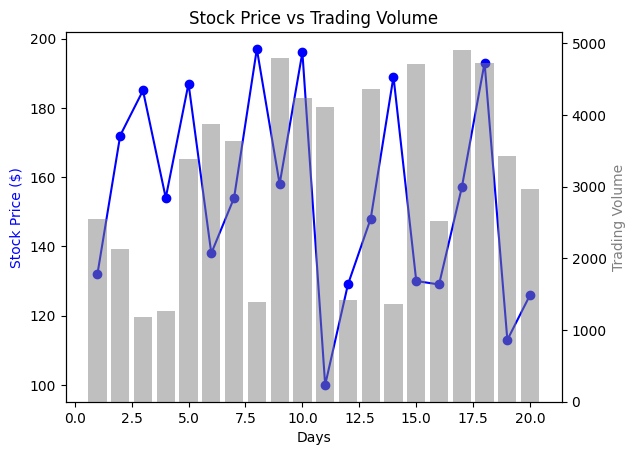

In [ ]:
days = np.arange(1, 21)
stock_price = np.random.randint(100, 200, size=20)
volume = np.random.randint(1000, 5000, size=20)

fig, ax1 = plt.subplots()

# Stock Price Line
ax1.plot(days, stock_price, color="blue", marker="o")
ax1.set_xlabel("Days")
ax1.set_ylabel("Stock Price ($)", color="blue")

# Trading Volume Bar
ax2 = ax1.twinx()
ax2.bar(days, volume, color="gray", alpha=0.5)
ax2.set_ylabel("Trading Volume", color="gray")

plt.title("Stock Price vs Trading Volume")
plt.show()

Q4. Visualize Training Loss vs. Validation Accuracy across 50 epochs using `twinx()`.

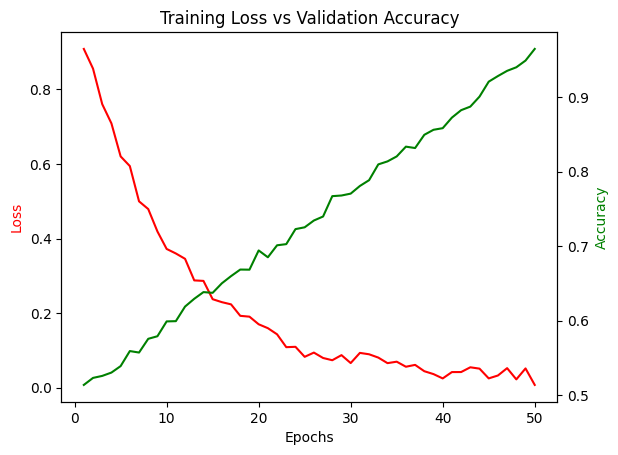

In [ ]:
epochs = np.arange(1, 51)
loss = np.exp(-epochs/10) + np.random.rand(50) * 0.05
accuracy = np.linspace(0.5, 0.95, 50) + np.random.rand(50) * 0.02

fig, ax1 = plt.subplots()

# Loss curve
ax1.plot(epochs, loss, color="red", label="Training Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss", color="red")

# Accuracy curve
ax2 = ax1.twinx()
ax2.plot(epochs, accuracy, color="green", label="Validation Accuracy")
ax2.set_ylabel("Accuracy", color="green")

plt.title("Training Loss vs Validation Accuracy")
plt.show()

### Summary

Multiple Y-axes and twin axes are extremely useful when comparing variables with different scales on the same chart. Using `twinx()` and `twiny()`, Matplotlib allows us to overlay multiple datasets clearly without distorting their relationships. This technique helps in data science and AI/ML tasks where variables like **loss vs. accuracy**, **sales vs. discount**, or **stock price vs. volume** need to be visualized together. By carefully choosing colors, labels, and legends, we can make these visualizations both informative and easy to interpret.